# Analyze TOMT Solved

In [1]:
import pandas as pd
from tqdm import tqdm
import json
pathIn = '/mnt/ceph/storage/data-in-progress/data-research/web-search/false-memories/reddit-tomt/tomt-dataset-26-01-2023/reddit-tomt-submissions.jsonl.gz'

## Read dataset

In [2]:
import gzip
with gzip.open(pathIn, 'rt') as f:
    d_all = []
    # Iterate through the lines in the file
    for line in tqdm(f):
        # Parse the line as a JSON object
        obj = json.loads(line)
        d_all.append(obj)
df_orig = pd.DataFrame(d_all)

1279425it [04:11, 5088.68it/s]


## Check data

In [4]:
len(df_orig)

1279425

In [5]:
# check if "Solved!"-flag has been successfully eliminated
assert(len(df_orig.loc[df_orig['link_flair_text'] == 'Solved!']) == 0)

In [6]:
df_orig[['created_utc', 'link_flair_text', 'solved_utc', 'title', 'content', 'chosen_answer', 'links_on_answer_path']]

,created_utc,link_flair_text,solved_utc,title,content,chosen_answer,links_on_answer_path
0,1409620809,None,,[TOMT] song about a child by a young mother,It was a video posted a couple of months ago. ...,,[]
1,1409621706,Solved,1409621904,[TOMT][BOOK] Book I read in 3rd grade,There was a book I read in third grade... here...,[Wayside School (book series)](http://www.loui...,[http://www.louissachar.com/Wayside.htm)]
2,1409621747,None,,[TOMT][music] looking for an album cover...,The cover has a dark circular face..could be a...,,[]
3,1409621789,Solved,,"[TOMT] [Song] Chill, repeats ""faded away""","It's a chill song, laid back, kind of melancho...",,[]
4,1409621843,Open,,[TOMT][Movie] Asian Mystery/Horror/Supernatura...,I have a really vague memory of it. I don't ev...,,[]
...,...,...,...,...,...,...,...
1279420,1646024478,Solved,1646024671,[TOMT][SONG][1970s] Classic rock song,The guitar used at the beginning of [Caroline ...,Ramble On by Led Zeppelin,[]
1279421,1646024504,Open,,[TOMT] Trying to remember a method to search f...,Hello guys. I'm trying to remember a method th...,,[]
1279422,1646025318,Solved,,[TOMT] 2018~2019 Tiktok “Trend” w/ Blonde Girl...,back in 2018-2019ish when that one viral video...,,[]
1279423,1646025501,Open,,"[TOMT] Band similiar to disturbed, can only re...",I listened to this band years ago so I only re...,,[]


## Extract solved TOMT questions

In [3]:
df_solved = df_orig.loc[(df_orig['link_flair_text'] == 'Solved') | (df_orig['link_flair_text'] == 'Solved!')]
df_solved

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
1,False,self.tipofmytongue,None,1409621706,1409621904,tipofmytongue,{},{},[Wayside School (book series)](http://www.loui...,[http://www.louissachar.com/Wayside.htm)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,self.tipofmytongue,None,1409621789,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,self.tipofmytongue,None,1409622562,1409623490,tipofmytongue,{},{},Astros?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,self.tipofmytongue,None,1409622797,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,False,self.tipofmytongue,None,1409966264,1409966764,tipofmytongue,{},{},[A Lesson Is Learned But the Damage is Irrever...,[http://alessonislearned.com/index.php?comic=42)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279414,False,self.tipofmytongue,1,1645797771,1645799159,tipofmytongue,{},{},This sure sounds like you’re describing “Nante...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279415,False,self.tipofmytongue,4,1646023905,1646024132,tipofmytongue,{},{},CHUMBY!!!!!! ([Here’s one on eBay](https://www...,[https://www.ebay.com/itm/Chumby-ORIGINAL-Inte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279417,False,self.tipofmytongue,None,1646024173,1646028613,tipofmytongue,{},{},Could it be Lebensader?\n\nhttps://youtu.be/Cj...,[https://youtu.be/CjO-uwzo8BA],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279420,False,self.tipofmytongue,11,1646024478,1646024671,tipofmytongue,{},{},Ramble On by Led Zeppelin,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def extract_date(ts):
    from datetime import datetime
    if ts == "":
        return datetime.utcfromtimestamp(0)
    ts = int(ts)
    return datetime.utcfromtimestamp(ts)

In [9]:
# create df_gold which contains all the questions for the Gold Answers that could be extracted
df_gold = df_solved.loc[df_solved['solved_utc'] != '']

# t_wait is the time from creating the question to obtaining the Gold Answer
df_gold['t_wait'] = df_gold['solved_utc'].astype(int) - df_gold['created_utc'].astype(int)
df_gold['year'] = [extract_date(i).year for i in df_gold['created_utc']]
df_gold

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits,t_wait,year
1,False,self.tipofmytongue,None,1409621706,1409621904,tipofmytongue,{},{},[Wayside School (book series)](http://www.loui...,[http://www.louissachar.com/Wayside.htm)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,2014
8,False,self.tipofmytongue,None,1409622562,1409623490,tipofmytongue,{},{},Astros?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,928,2014
12,False,self.tipofmytongue,None,1409966264,1409966764,tipofmytongue,{},{},[A Lesson Is Learned But the Damage is Irrever...,[http://alessonislearned.com/index.php?comic=42)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,2014
16,False,self.tipofmytongue,None,1409967389,1409972675,tipofmytongue,{},{},[K-391 - Rypejakten 2013](http://www.youtube.c...,"[http://www.youtube.com/watch?v=gT9Dj4Z2XvI, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5286,2014
20,False,self.tipofmytongue,None,1410305389,1410305452,tipofmytongue,{},{},Come out and play - the Offspring,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279412,False,self.tipofmytongue,None,1645797322,1645801561,tipofmytongue,{},{},Kid 'n' Teenagerz?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4239,2022
1279414,False,self.tipofmytongue,1,1645797771,1645799159,tipofmytongue,{},{},This sure sounds like you’re describing “Nante...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388,2022
1279415,False,self.tipofmytongue,4,1646023905,1646024132,tipofmytongue,{},{},CHUMBY!!!!!! ([Here’s one on eBay](https://www...,[https://www.ebay.com/itm/Chumby-ORIGINAL-Inte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227,2022
1279417,False,self.tipofmytongue,None,1646024173,1646028613,tipofmytongue,{},{},Could it be Lebensader?\n\nhttps://youtu.be/Cj...,[https://youtu.be/CjO-uwzo8BA],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4440,2022


In [10]:
df_gold.groupby('year').mean()['t_wait']

year
2009      7587.000000
2010    346836.630435
2011     39168.822630
2012     81277.374109
2013     32527.738463
2014     22665.816522
2015     36268.740232
2016     22210.742976
2017     13521.700975
2018     16080.770973
2019     40067.025379
2020     62279.068286
2021     89209.175266
2022     31743.921166
Name: t_wait, dtype: float64

## Time Distribution of Created and Solved Flags

### Paper Table

In [11]:
import re
def extract_category(title):
    ret = re.findall(r'\[.*?\]', title)
    return [x.lower() for x in ret]

In [12]:
def inkrement_dict(elem, dict_, val=1):
    if elem in dict_:
        dict_[elem] += val
    else :
        dict_[elem] = val

In [13]:
import datetime
cnt_all = {} # number of all TOMT questions
sol_all = {} # number of all solved questions
sol_all_gold_answ = {} # number all questions with an extracted Gold Answer
t_abs_all = {} # sum: number of waiting time in hours


cnt_music = {} # number of TOMT music questions
sol_music = {} # number of solved music questions
sol_music_gold_answ = {} # number music questions with an extracted Gold Answer
t_abs_music = {} # sum: number of waiting time in hours for music questions

cnt_movies = {}
sol_movies = {}
sol_movies_gold_answ = {}
t_abs_movies = {}

cnt_books = {}
sol_books = {}
sol_books_gold_answ = {}
t_abs_books = {}

cnt_games = {}
sol_games = {}
sol_games_gold_answ = {}
t_abs_games = {}

In [14]:
# create statistics

c = 0
limit = len(df_orig)+10
for i in tqdm(range(len(df_orig))):
    c+= 1
    if c > limit:
        break
        
        
    line = df_orig.iloc[i]    
    cat = extract_category(line['title'])
    
    created = line['created_utc']
    solved = line['solved_utc']   
    
    date_time = extract_date(created)
    y = date_time.year
    date_time_solved = extract_date(solved)
    y_s = date_time_solved.year
    
    
    inkrement_dict(y, cnt_all) 
        
    if '[song]' in cat or '[music]' in cat:
        inkrement_dict(y, cnt_music)  
    if '[movie]' in cat or '[video]' in cat:
        inkrement_dict(y, cnt_movies)  
    if '[book]' in cat:
        inkrement_dict(y, cnt_books)
    if '[game]' in cat:
        inkrement_dict(y, cnt_games)
    
    if line['link_flair_text'] == 'Solved':
        inkrement_dict(y, sol_all)
        if '[song]' in cat or '[music]' in cat:
            inkrement_dict(y, sol_music)  
        if '[movie]' in cat or '[video]' in cat:
            inkrement_dict(y, sol_movies)  
        if '[book]' in cat:
            inkrement_dict(y, sol_books)
        if '[game]' in cat:
            inkrement_dict(y, sol_games)
    if solved == '':
        continue
    
    solved = float(str(solved))
    created = float(str(created))
   
    if created <= solved:
        inkrement_dict(y, sol_all_gold_answ)
        wait = solved - created
        if wait < 0:
            print('komisch')
        wait /= 3600.0
        
        inkrement_dict(y, t_abs_all, wait)          
            
        #for a in cat:
            #print(a)
        
        if '[song]' in cat or '[music]' in cat:
            inkrement_dict(y, sol_music_gold_answ)  
            inkrement_dict(y, t_abs_music, wait)  
        if '[movie]' in cat or '[video]' in cat:
            inkrement_dict(y, sol_movies_gold_answ)  
            inkrement_dict(y, t_abs_movies, wait)  
        if '[book]' in cat:
            inkrement_dict(y, sol_books_gold_answ)
            inkrement_dict(y, t_abs_books, wait)  
        if '[game]' in cat:
            inkrement_dict(y, sol_games_gold_answ)
            inkrement_dict(y, t_abs_games, wait)  

100%|███████████████████████████████| 1279425/1279425 [02:55<00:00, 7294.39it/s]


In [15]:
t_all = {}
t_music = {}
t_movies = {}
t_books = {}
t_games = {}

sol_all_rel = {}
sol_music_rel = {}
sol_movies_rel = {}
sol_books_rel = {}
sol_games_rel = {}

def get_avg(t_abs, t_rel, no):
    for year, time_abs in t_abs.items():
        t_rel[year] = time_abs / float(no[year])

# get average waiting time per category
get_avg(t_abs_all, t_all, sol_all_gold_answ)
get_avg(t_abs_music, t_music, sol_music_gold_answ)
get_avg(t_abs_movies, t_movies, sol_movies_gold_answ)
get_avg(t_abs_books, t_books, sol_books_gold_answ)
get_avg(t_abs_games, t_games, sol_games_gold_answ)

# get average solved numbers per category
get_avg(sol_all, sol_all_rel, cnt_all)
get_avg(sol_music, sol_music_rel, cnt_music)
get_avg(sol_movies, sol_movies_rel, cnt_movies)
get_avg(sol_books, sol_books_rel, cnt_books)
get_avg(sol_games, sol_games_rel, cnt_games)

In [16]:
cols = ['cnt_all', 'sol_all', 't_all','cnt_music', 'sol_music', 't_music', 'cnt_movies', 'sol_movies', 't_movies', 'cnt_books', 'sol_books', 't_books', 'cnt_games', 'sol_games', 't_games']
df_table = pd.DataFrame(columns=cols, index=sorted(cnt_all.keys()))
df_table.index.name = 'year'

In [18]:
df_table["cnt_all"] = pd.Series(cnt_all)
df_table["sol_all"] = pd.Series(sol_all_rel)
df_table["t_all"] = pd.Series(t_all)

df_table["cnt_music"] = pd.Series(cnt_music)
df_table["sol_music"] = pd.Series(sol_music_rel)
df_table["t_music"] = pd.Series(t_music)

df_table["cnt_movies"] = pd.Series(cnt_movies)
df_table["sol_movies"] = pd.Series(sol_movies_rel)
df_table["t_movies"] = pd.Series(t_movies)

df_table["cnt_books"] = pd.Series(cnt_books)
df_table["sol_books"] = pd.Series(sol_books_rel)
df_table["t_books"] = pd.Series(t_books)

df_table["cnt_games"] = pd.Series(cnt_games)
df_table["sol_games"] = pd.Series(sol_games_rel)
df_table["t_games"] = pd.Series(t_games)

drop_list = ['sol_all', 't_all', 'sol_music', 't_music', 'sol_movies', 't_movies', 'sol_books', 't_books', 'sol_games', 't_games']
df_table.loc['Total']= df_table.drop(drop_list, axis=1).sum()

# fill Total
df_table.loc['Total']['sol_all'] = len(df_solved) / len(df_orig)
df_table.loc['Total']['t_all'] = df_gold['t_wait'].sum() / len(df_gold) / 3600.0
df_table.loc['Total']['sol_music'] = sum(sol_music.values()) / sum(cnt_music.values())
df_table.loc['Total']['sol_movies'] = sum(sol_movies.values()) / sum(cnt_movies.values())
df_table.loc['Total']['sol_books'] = sum(sol_books.values()) / sum(cnt_books.values())
df_table.loc['Total']['sol_games'] = sum(sol_games.values()) / sum(cnt_games.values())

df_table.loc['Total']['t_music'] = sum(t_abs_music.values()) / sum(sol_music_gold_answ.values())
df_table.loc['Total']['t_movies'] = sum(t_abs_movies.values()) / sum(sol_movies_gold_answ.values())
df_table.loc['Total']['t_books'] = sum(t_abs_books.values()) / sum(sol_books_gold_answ.values())
df_table.loc['Total']['t_games'] = sum(t_abs_games.values()) / sum(sol_games_gold_answ.values())


# fill Mean
df_table.loc['mean'] = df_table.drop('Total', axis=0).mean()

df_table = df_table.round(2)

df_table = df_table.astype({'cnt_all':'int'})
df_table = df_table.astype({'cnt_music':'int'})
df_table = df_table.astype({'cnt_movies':'int'})
df_table = df_table.astype({'cnt_books':'int'})
df_table = df_table.astype({'cnt_games':'int'})

df_table

,cnt_all,sol_all,t_all,cnt_music,sol_music,t_music,cnt_movies,sol_movies,t_movies,cnt_books,sol_books,t_books,cnt_games,sol_games,t_games
year,,,,,,,,,,,,,,,
2009,1045,0.01,2.11,36,0.03,0.22,47,NaN,NaN,18,NaN,NaN,9,NaN,NaN
2010,3861,0.02,96.34,97,0.02,0.49,268,0.03,671.28,97,NaN,NaN,25,0.08,0.09
2011,24544,0.02,10.88,1591,0.02,2.01,2702,0.02,2.95,834,0.03,99.47,246,0.03,1.07
2012,52356,0.34,22.58,6231,0.35,72.53,7672,0.38,13.25,2294,0.33,15.81,1491,0.42,18.05
2013,84675,0.48,9.04,12564,0.46,6.83,11332,0.53,23.26,2894,0.50,14.41,2326,0.56,5.92
2014,95949,0.42,6.30,14961,0.42,7.25,13747,0.47,4.30,2878,0.44,9.33,2422,0.48,13.76
2015,110609,0.43,10.07,18462,0.43,12.81,16775,0.47,5.21,3392,0.42,10.07,2798,0.46,9.78
2016,97984,0.47,6.17,19143,0.46,5.53,16021,0.50,4.78,2996,0.44,5.54,2380,0.49,4.44
2017,100888,0.46,3.76,19532,0.44,4.24,17081,0.51,3.40,3215,0.45,5.79,2272,0.48,4.25


### Investigate Precision and recall
- extract 50 random questions and 50 random questions with extracted gold answer

In [19]:
df_recall = df_orig.sample(n = 50, random_state = 2)
df_recall

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
801397,NaN,self.tipofmytongue,None,1554927621,1554934988,tipofmytongue,{},{},"Drew Holcomb and the Neighbors, and Nathaniel ...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224875,False,self.tipofmytongue,None,1642386379,1642386594,tipofmytongue,{},{},Scare Tactics?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263255,NaN,self.tipofmytongue,None,1567382966,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096981,False,self.tipofmytongue,None,1473629391,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683118,False,self.tipofmytongue,None,1529050795,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52968,False,self.tipofmytongue,None,1609419591,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205458,NaN,self.tipofmytongue,1,1553823462,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962556,False,self.tipofmytongue,None,1479350413,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501516,NaN,self.tipofmytongue,1,1572181686,1572182924,tipofmytongue,{},{},There is an episode of 'Cory in the House' tha...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575406,False,self.tipofmytongue,None,1648281546,1648281841,tipofmytongue,{},{},qix (or a qix clone. there have been a lot),[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_precision = df_orig.loc[df_orig['chosen_answer'] != ''].sample(n = 50, random_state = 2)
df_precision

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
617668,False,self.tipofmytongue,None,1619840766,1619847604,tipofmytongue,{},{},https://youtu.be/pdrlrQT7Sp4 might be Monster ...,[https://youtu.be/pdrlrQT7Sp4],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628805,False,self.tipofmytongue,None,1602356518,1602366755,tipofmytongue,{},{},The Ghost of Crutchfield Hall?,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258289,False,self.tipofmytongue,2,1531319625,1531319715,tipofmytongue,{},{},"“Briefly stated, the Gell-Mann Amnesia effect ...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267892,False,self.tipofmytongue,None,1390336544,1390337114,tipofmytongue,{},{},[Hot Butter by Popcorn] (http://www.youtube.co...,[http://www.youtube.com/watch?v=YK3ZP6frAMc)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175097,False,self.tipofmytongue,None,1499059562,1499061663,tipofmytongue,{},{},[Led Zeppelin - Fool in the Rain](https://www....,[https://www.youtube.com/watch?v=Zp-LBD_q0sQ)?],...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112739,False,self.tipofmytongue,8,1633921675,1633921806,tipofmytongue,{},{},"The Stinky Feet Project, from the Spark\n\nhtt...",[http://web.archive.org/web/20001109055200/www...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324960,NaN,self.tipofmytongue,None,1387108980,1387109434,tipofmytongue,{},{},[The Arrival by Shaun Tan](http://www.shauntan...,[http://www.shauntan.net/books/the-arrival.html)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341359,NaN,self.tipofmytongue,None,1358061559,1358545355,tipofmytongue,{},{},It's [Now the Green Blade Riseth](https://www....,"[https://www.youtube.com/watch?v=27p98aLPZPI),]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963318,NaN,self.tipofmytongue,None,1537055489,1537056044,tipofmytongue,{},{},The Cave?\n\nhttps://youtu.be/QP4DsyaB1eE,[https://youtu.be/QP4DsyaB1eE],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868626,False,self.tipofmytongue,None,1400168457,1400169732,tipofmytongue,{},{},[This one](http://www.reddit.com/r/WTF/comment...,[http://www.reddit.com/r/WTF/comments/25h5o1/t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examinations

In [21]:
import seaborn as sns

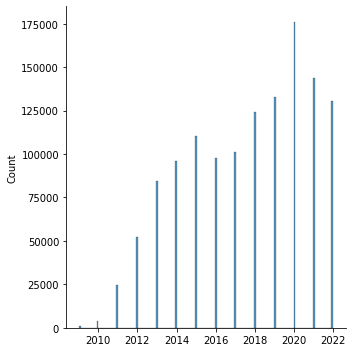

In [22]:
# number of created TOMT questions per year
sns.displot([extract_date(i).year for i in df_orig['created_utc']])

In [23]:
years = []

In [24]:
# number of all questions per year
tmp_y = [extract_date(i).year for i in df_orig['created_utc']]
years_orig = {}

for y in tmp_y:
    if y in years_orig:
        years_orig[y] += 1
    else :
        years_orig[y] = 1

In [25]:
# number of solved questions per year
tmp_y = [extract_date(i).year for i in df_solved['created_utc']]
years_solved = {}

for y in tmp_y:
    if y in years_solved:
        years_solved[y] += 1
    else :
        years_solved[y] = 1

In [26]:
# proportion of solved questions per year
prop_solved_per_year= {}
for y in years_solved.items():
    for y2 in years_orig.items():
        if y[0] == y2[0]:
            prop_solved_per_year[y[0]] = y[1]/y2[1]

In [28]:
# relative proportion of solved questions in TOMT-reddit over time
years_sort_prop = dict(sorted(prop_solved_per_year.items(), key=lambda item: (item[0], item[1])))
years_sort_prop

{2009: 0.0066985645933014355,
 2010: 0.02046102046102046,
 2011: 0.017804758800521514,
 2012: 0.34288333715333486,
 2013: 0.48328314142308826,
 2014: 0.42020239919123703,
 2015: 0.4268459166975563,
 2016: 0.46910720117570215,
 2017: 0.4647529934184442,
 2018: 0.4818007508499428,
 2019: 0.5223083691164637,
 2020: 0.4958558988158089,
 2021: 0.5181207586566905,
 2022: 0.5049317670122988}

In [29]:
# absolute number of solved questions in TOMT-reddit over time
years_sort = dict(sorted(years_solved.items(), key=lambda item: (item[0], item[1])))
years_sort

{2009: 7,
 2010: 79,
 2011: 437,
 2012: 17952,
 2013: 40922,
 2014: 40318,
 2015: 47213,
 2016: 45965,
 2017: 46888,
 2018: 59804,
 2019: 69455,
 2020: 87347,
 2021: 74441,
 2022: 65935}

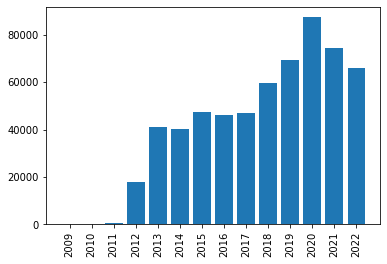

In [30]:
import matplotlib.pyplot as plt

plt.bar(range(len(years_sort)), list(years_sort.values()), tick_label=list(years_sort.keys()))
plt.xticks(rotation = 90)
plt.show()

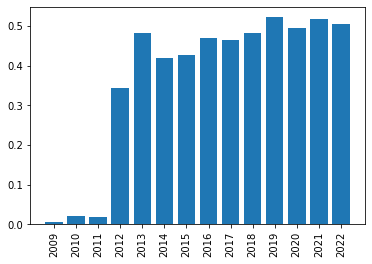

In [31]:
import matplotlib.pyplot as plt

plt.bar(range(len(years_sort_prop)), list(years_sort_prop.values()), tick_label=list(years_sort_prop.keys()))
plt.xticks(rotation = 90)
plt.show()

## Analyze solved dates based on extracted Gold answers: time of solving

In [32]:
tmp_y = [extract_date(i).year for i in df_orig['solved_utc']]
years_solved = {}

for y in tmp_y:
    if y in years_solved:
        years_solved[y] += 1
    else :
        years_solved[y] = 1
del years_solved[1970]

In [33]:
# absolute number of solved questions in TOMT-reddit over time
years_solved_sort = dict(sorted(years_solved.items(), key=lambda item: (item[0], item[1])))

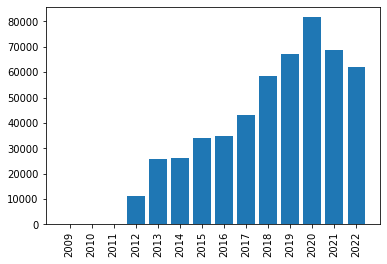

In [34]:
import matplotlib.pyplot as plt

plt.bar(range(len(years_solved_sort)), list(years_solved_sort.values()), tick_label=list(years_solved_sort.keys()))
plt.xticks(rotation = 90)
plt.show()

## Analyze: how many TOMT Questions have been solved in the same year?

In [36]:
no_solved_same_year = 0
no_solved_later = 0
other = 0

for i in range(len(df_orig)):
    year_created = extract_date(df_orig.at[i, 'created_utc']).year
    year_solved = extract_date(df_orig.at[i, 'solved_utc']).year
    if year_created == year_solved:
        no_solved_same_year += 1
    elif year_solved > year_created:
        no_solved_later +=1
    else:
        other += 1
print('Solved in the same year: ', no_solved_same_year)
print('Solved later: ', no_solved_later)
print('Other: ', other)

Solved in the same year:  512760
Solved later:  724
Other:  765941


## Extract questions that are solved fast (same day) and slowly

In [39]:
no_same_day = 0
no_same_week = 0
no_same_month = 0
no_same_year = 0
no_later = 0
earlier = 0


for i in range(len(df_solved)):  
    if i not in df_solved.index:
        continue
    date_c = extract_date(df_solved.at[i, 'created_utc'])
    day_created = date_c.day
    month_created = date_c.month
    year_created = date_c.year
    
    date_s = extract_date(df_solved.at[i, 'solved_utc'])
    day_solved = date_s.day
    month_solved = date_s.month
    year_solved = date_s.year
    
    if year_created == year_solved:
        if month_created == month_solved:
            if day_created == day_solved:
                no_same_day += 1
            elif day_solved <= day_created+7:
                no_same_week += 1
            else:
                no_same_month += 1
        else:
            no_same_year += 1
    elif year_solved > year_created:
        no_later +=1
    else:
        earlier += 1
print('Solved on the same day: ', no_same_day)
print('Solved in the same week: ', no_same_week)
print('Solved in the same month: ', no_same_month)
print('Solved in the same year: ', no_same_year)
print('Solved later: ', no_later)
print('Solved earlier ', earlier)

Solved on the same day:  217881
Solved in the same week:  18676
Solved in the same month:  590
Solved in the same year:  1909
Solved later:  353
Solved earlier  38924


In [55]:
import random

no_target = 100

no_same_day = 0
no_same_week = 0
no_same_month = 0
no_same_year = 0
no_later = 0
earlier = 0

df_day = pd.DataFrame()
df_week = pd.DataFrame()
df_month = pd.DataFrame()
df_year = pd.DataFrame()
df_later = pd.DataFrame()
df_earlier = pd.DataFrame()


for i in range(len(df_solved2)):  
    if i not in df_solved2.index:
        continue
    #date_c = extract_date(df_solved2.iloc[i]['created_utc'])
    date_c = extract_date(df_solved2.at[i, 'created_utc'])
    day_created = date_c.day
    month_created = date_c.month
    year_created = date_c.year
    
    #date_s = extract_date(df_solved2.iloc[i]['solved_utc'])
    date_s = extract_date(df_solved2.at[i, 'solved_utc'])
    day_solved = date_s.day
    month_solved = date_s.month
    year_solved = date_s.year
    
    if year_created == year_solved:
        if month_created == month_solved:
            if day_created == day_solved:
                rand = random.randint(0, 2000)
                if rand != 1 or no_same_day >= no_target:
                    continue
                df_day = df_day.append(df_solved2.iloc[i], ignore_index=True)
                no_same_day += 1
            elif day_solved <= day_created+7:
                rand = random.randint(0, 170)
                if rand != 1 or no_same_week >= no_target:
                    continue
                df_week = df_week.append(df_solved2.iloc[i], ignore_index=True)
                no_same_week += 1
            else:
                rand = random.randint(0, 4)
                if rand != 1 or no_same_month >= no_target:
                    continue
                df_month = df_month.append(df_solved2.iloc[i], ignore_index=True)
                no_same_month += 1
        else:
            rand = random.randint(0, 17)
            if rand != 1 or no_same_year >= no_target:
                continue
            df_year = df_year.append(df_solved2.iloc[i], ignore_index=True)
            no_same_year += 1
    elif year_solved > year_created:
        rand = random.randint(0, 2)
        if rand != 1 or no_later >= no_target:
            continue
        df_later = df_day.append(df_solved2.iloc[i], ignore_index=True)
        no_later +=1
    else:
        earlier += 1
print(no_same_day)
print(no_same_week)
print(no_same_month)
print(no_same_year)
print(no_later)
print(earlier)

100
100
100
100
100
38924


In [59]:
df_day

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
0,NaN,self.tipofmytongue,None,1541995098.0,1541995150.0,tipofmytongue,{},{},[Flex-a-tone](https://youtube.com/watch?v=HEW1...,[https://youtube.com/watch?v=HEW1aG8XJQk)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,self.tipofmytongue,None,1398964568,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,self.tipofmytongue,None,1528156170,1528156412,tipofmytongue,{},{},It's a marching band-ish version of the song [...,[https://www.youtube.com/watch?v=-y3h9p_c5-M)],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,self.tipofmytongue,None,1357044816,1357046695,tipofmytongue,{},{},"How about ""Traveling to Tondo""? \nhttp://www.p...",[http://www.personal.psu.edu/nda5017/blogs/chi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,self.tipofmytongue,None,1502749012,1502752062,tipofmytongue,{},{},https://www.youtube.com/watch?v=dRBP1rpE5y8 F...,[https://www.youtube.com/watch?v=dRBP1rpE5y8],...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,self.tipofmytongue,1,1560116049,1560116638,tipofmytongue,{},{},https://www.youtube.com/watch?v=aLvgx44T-k4\n\...,[https://www.youtube.com/watch?v=aLvgx44T-k4],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,self.tipofmytongue,None,1582241519,,tipofmytongue,{},{},,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,self.tipofmytongue,None,1563364891,1563365182,tipofmytongue,{},{},Xena Warrior Princess?\n\nEdit: https://en.wik...,[https://en.wikipedia.org/wiki/Xena%3A_Warrior...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,self.tipofmytongue,None,1577320542,1577320950,tipofmytongue,{},{},https://www.gamecreation.org/games/30_second_l...,[https://www.gamecreation.org/games/30_second_...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Write random examples to csv

In [56]:
filename = 'sample-data/solved-same-day.csv'
df_day.to_csv(filename, index=False)

filename = 'sample-data/solved-same-week.csv'
df_week.to_csv(filename, index=False)

filename = 'sample-data/solved-same-month.csv'
df_month.to_csv(filename, index=False)

filename = 'sample-data/solved-same-year.csv'
df_year.to_csv(filename, index=False)

filename = 'sample-data/solved-later.csv'
df_later.to_csv(filename, index=False)

In [75]:
filename = 'sample-data/solved-later.csv'

In [76]:
df_test = pd.read_csv(filename)

In [77]:
df_test

,hide_score,domain,author_flair_text,created_utc,solved_utc,subreddit,media_embed,secure_media_embed,chosen_answer,links_on_answer_path,...,brand_safe,mod_note,mod_reason_by,mod_reason_title,approved_at_utc,banned_at_utc,rte_mode,post_categories,visited,previous_visits
0,NaN,self.tipofmytongue,NaN,1.541995e+09,1.541995e+09,tipofmytongue,{},{},[Flex-a-tone](https://youtube.com/watch?v=HEW1...,['https://youtube.com/watch?v=HEW1aG8XJQk)'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,self.tipofmytongue,NaN,1.398965e+09,NaN,tipofmytongue,{},{},NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,self.tipofmytongue,NaN,1.528156e+09,1.528156e+09,tipofmytongue,{},{},It's a marching band-ish version of the song [...,['https://www.youtube.com/watch?v=-y3h9p_c5-M)'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,self.tipofmytongue,NaN,1.357045e+09,1.357047e+09,tipofmytongue,{},{},"How about ""Traveling to Tondo""? \nhttp://www.p...",['http://www.personal.psu.edu/nda5017/blogs/ch...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,self.tipofmytongue,NaN,1.502749e+09,1.502752e+09,tipofmytongue,{},{},https://www.youtube.com/watch?v=dRBP1rpE5y8 F...,['https://www.youtube.com/watch?v=dRBP1rpE5y8'],...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,self.tipofmytongue,NaN,1.446011e+09,NaN,tipofmytongue,{},{},NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,False,self.tipofmytongue,NaN,1.393520e+09,1.393523e+09,tipofmytongue,{},{},[This](http://knowyourmeme.com/memes/trollbait...,['http://knowyourmeme.com/memes/trollbait-nobo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,False,self.tipofmytongue,NaN,1.399868e+09,1.399870e+09,tipofmytongue,{},{},[Is it this dude?](https://www.youtube.com/wat...,['https://www.youtube.com/watch?v=oab9giH2cG0)'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,False,self.tipofmytongue,NaN,1.400877e+09,1.400878e+09,tipofmytongue,{},{},It's Harvey Korman in a scene from Mel Brooks'...,['http://www.youtube.com/watch?v=UW5iZ5fazWw)'],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyze random examples

In [92]:
i = 1
pd.set_option('display.max_colwidth', None)  # or 199
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_day[['title', 'content', 'chosen_answer', 'url']].iloc[i].to_string())
pd.reset_option('display.max_colwidth')

title                                                                                           [TOMT]What is the song played in this scene?
content          https://www.youtube.com/watch?v=xz5P1j-dHn0#t=0m27s the song right afte he throws the molotov cocktail!\ncheers in advance!
chosen_answer                                                                                                                               
url                                         http://www.reddit.com/r/tipofmytongue/comments/24gxdo/tomtwhat_is_the_song_played_in_this_scene/
